# **K-Means Clustering on the Iris Dataset**


# 1. Introduction to K-Means Clustering

### **Introduction**

Clustering is an essential unsupervised learning technique used to group similar data points into clusters based on their features. In this analysis, I applied the **K-means clustering algorithm** to the Iris dataset to explore its natural groupings and validate the effectiveness of clustering techniques.

The **Iris dataset**, a widely used benchmark in machine learning, consists of 150 samples of three Iris species (`Setosa`, `Versicolor`, and `Virginica`). It includes four numeric features: **sepal length**, **sepal width**, **petal length**, and **petal width**. The dataset was not preprocessed as it is known to be already cleaned. It is ideal for clustering because its species form natural groupings, particularly based on petal measurements.

The goal of this analysis was to:
1. Identify the optimal number of clusters for the dataset.
2. Evaluate the impact of data preprocessing techniques such as scaling and PCA (Principal Component Analysis) on clustering performance.
3. Compare the clustering results with the true species labels to assess the algorithm's accuracy and limitations.

To achieve these objectives, I used:
- Elbow Method and silhouette Analysis to determine the optimal number of clusters.
- Multiple approaches for clustering, including:
  - Raw data without any transformation.
  - Scaled data.
  - PCA applied to scaled data.

By analyzing these results, I aimed to uncover the best clustering approach for the Iris dataset while understanding how preprocessing steps influence clustering performance.


# 2. Dataset Loading and Overview


The Iris dataset contains:

•	**Features**: Sepal length, sepal width, petal length, petal width.

•	**Target** (species): Three classes - Setosa, Versicolor, Virginica.


In [ ]:
import pandas as pd

# Load the dataset
iris = pd.read_csv("https://raw.githubusercontent.com/govinda-lienart/iris_dataset/refs/heads/main/iris.csv")

# Inspect the data
print(iris.info())

# Replace the column name 'variety' with 'species'
iris.rename(columns={'variety': 'species'}, inplace=True)

# Confirm the change
print(iris.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   sepal.length  sepal.width  petal.length  petal.width species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


# 3. Frequency Distribution

A quick check on how species are distributed in the dataset:

In [ ]:
iris_outcome = pd.crosstab(index=iris["species"], columns="count")
print(iris_outcome)

col_0       count
species          
Setosa         50
Versicolor     50
Virginica      50


# 4. Data Preprocessing

I extracted the feature columns for clustering because clustering algorithms like K-means operate on numeric data points to identify groupings based on patterns and distances between them. In the Iris dataset, the feature columns (sepal.length, sepal.width, petal.length, and petal.width) represent measurable characteristics of the flowers, which are essential for distinguishing between species. The species labels were excluded during clustering since this is an unsupervised learning process, and including the labels would undermine the algorithm’s independence. By using only the numeric features, I ensured the algorithm focuses on the most relevant data for identifying meaningful clusters.

In [ ]:
features = iris.iloc[:, [0, 1, 2, 3]].values

# values: This is an attribute of a pandas DataFrame that returns the underlying numpy array containing the data. The values attribute strips away the column names and indexes, returning just the raw data in an array.
# By using .values, it means converting the selected data into a NumPy array format, which is useful for numerical operations and machine learning tasks where numpy arrays are the preferred input format.

# 5. Methods to Determine Optimal  k

To determine the optimal  k  (number of clusters) in clustering 2 methods were used. Elbow method and Silhouette Analysis




## 5.1 Elbow Method

The **Elbow Method** is used to determine the optimal number of clusters in a clustering algorithm like K-Means. It involves running the algorithm for different values of k (the number of clusters) and calculating the Within-Cluster Sum of Squares (WCSS) for each value. A plot is then created with k on the x-axis and WCSS on the y-axis. As the number of clusters increases, the WCSS decreases, but at some point, the rate of decrease slows down significantly, forming an “elbow” in the plot. The value of k at this “elbow” is considered the optimal number of clusters, as adding more clusters beyond this point does not provide a substantial improvement in clustering quality.


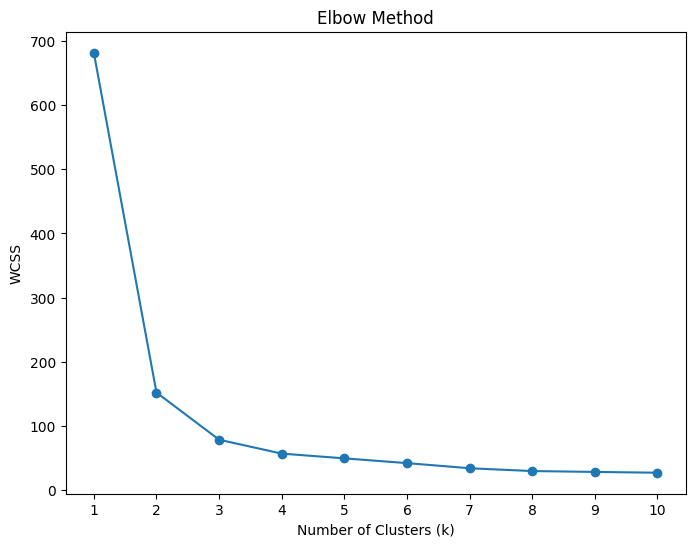

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize an empty list to store the Within-Cluster Sum of Squares (WCSS) for each value of k
wcss = []

# Define the range of k values (number of clusters) to test, from 1 to 10
k_values = range(1, 11)

# Loop over different k values (from 1 to 10) to calculate WCSS
for k in k_values:
    # Initialize the KMeans model with the current number of clusters (k)
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Fit the model to the data (features) and perform clustering
    kmeans.fit(features)

    # Append the Within-Cluster Sum of Squares (WCSS) to the wcss list
    # The inertia_ attribute stores the WCSS, which is a measure of the sum of squared distances of samples to their closest cluster center
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to visualize the WCSS for each k
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)  # Set ticks to be 1 through 10
plt.show()

Elbow Method:
- The “elbow” is observed at  k = 3 . This is where the WCSS (within-cluster sum of squares) stops decreasing significantly, suggesting that 3 clusters might be optimal for this dataset.


## 5.2 silhouette

The **Silhouette Method** is a technique used to evaluate the quality of clusters formed by a clustering algorithm, such as K-Means. It measures how well each data point fits into its assigned cluster by considering both cohesion (how close the data point is to others in the same cluster) and separation (how far it is from points in other clusters). The silhouette score ranges from -1 to +1, with a score close to +1 indicating that the data point is well-clustered, a score near 0 suggesting the point is near the boundary of two clusters, and a score close to -1 implying poor clustering. A higher average silhouette score across all data points suggests better clustering, with well-separated and compact clusters.

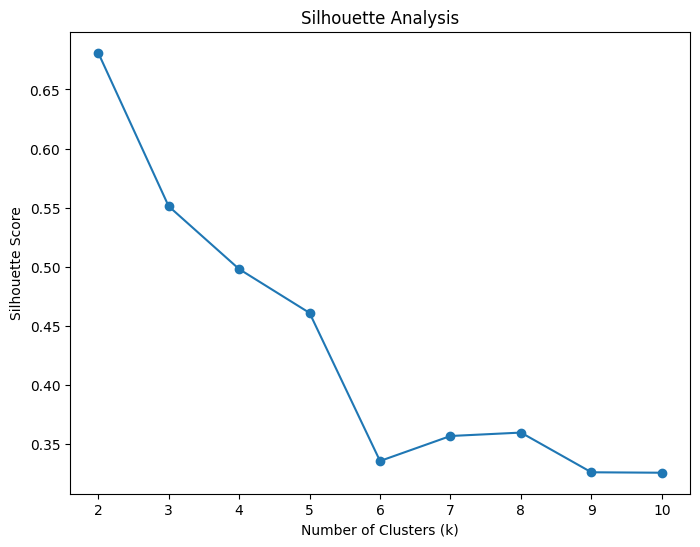

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11)  # Start from 2 because silhouette score is undefined for k=1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(features)
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)

# Plot the Silhouette Analysis
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

**Analysis of the Plots**


Silhouette Analysis:
- The silhouette score peaks at  k = 2 , but it is also relatively high at  k = 3 . Given that the Iris dataset naturally has 3 species,  k = 3  is likely a better choice as it aligns with the known structure of the data and with the elbow method results

# 6. Run K-Means with  k = 3 :

In this code, I applied the K-means clustering algorithm with  k = 3 , aligning with the number of expected clusters in the Iris dataset. The fit_predict method assigns each data point to one of the three clusters based on their proximity to the nearest cluster centroid. The resulting labels array indicates the cluster assignment for each data point, while the cluster_centers_ attribute stores the centroids of the three clusters. These centroids represent the mean position of all data points within each cluster, acting as the central reference points that define the cluster boundaries. If scaling is applied, the clustering operates in the scaled feature space, ensuring equal weight for all features.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(features)
centroids = kmeans.cluster_centers_
print("Cluster Centers:\n", centroids)

Cluster Centers:
 [[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


The cluster centers represent the centroids of the three clusters identified by the K-means algorithm, calculated as the mean of all data points within each cluster. Each row corresponds to a cluster, with the values indicating the centroid’s coordinates in the four-dimensional feature space of the Iris dataset (sepal.length, sepal.width, petal.length, petal.width). For example, the first cluster has a centroid at approximately [5.88, 2.74, 4.39, 1.43], which indicates the average measurements of the flowers in this cluster. These centroids serve as the central reference points for their respective clusters and help define cluster boundaries during the assignment of data points.

## 7. Evaluating Clustering Approaches on the Iris Dataset: K-Means with and without Feature Transformations (Scaling and PCA)


After determining the optimal number of clusters, I move forward with evaluating the clustering performance using Silhouette Scores, Homogeneity, and Completeness, which provide  meaningful insights into the quality of the clustering based on how well the data points within clusters align with the true labels.

**Silhouette Score, Homogeneity, and Completeness** are metrics used to evaluate clustering, but they focus on different aspects of the clustering performance.

The **Silhouette Score** measures both the cohesion (how close points in a cluster are to each other) and separation (how distinct the clusters are from each other), with higher values indicating better-defined clusters. A silhouette score close to +1 indicates well-defined clusters, whereas a score near 0 means that points lie on the border of two clusters, and a negative score suggests that points may have been misclassified.

**Homogeneity** evaluates whether each cluster contains only data points from a single true class, meaning a high score indicates that most points in a cluster belong to the same class. A perfect homogeneity score (1.0) would mean that all points in each cluster belong to a single true class. Lower scores indicate that clusters contain a mix of true classes, suggesting that the clustering is less precise.

**Completeness**, on the other hand, assesses whether all points of a single true class are assigned to the same cluster, so a high score means all points from the same class are grouped together. A score of 1.0 means that all points from a class are correctly clustered together, while lower values suggest that some points from a true class are dispersed across multiple clusters.

In short, the **Silhouette Score** provides an overall assessment of cluster quality by measuring both cohesion and separation, while **Homogeneity** and **Completeness** evaluate how well the clusters align with the true class labels. For good clustering results, it's ideal to have high values for all three metrics, indicating that the clusters are well-defined and that the data points are correctly grouped based on their true labels.

<ipython-input-104-5df45c09c5f2>:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(approaches, rotation=15)
<ipython-input-104-5df45c09c5f2>:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(approaches, rotation=15)
<ipython-input-104-5df45c09c5f2>:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(approaches, rotation=15)


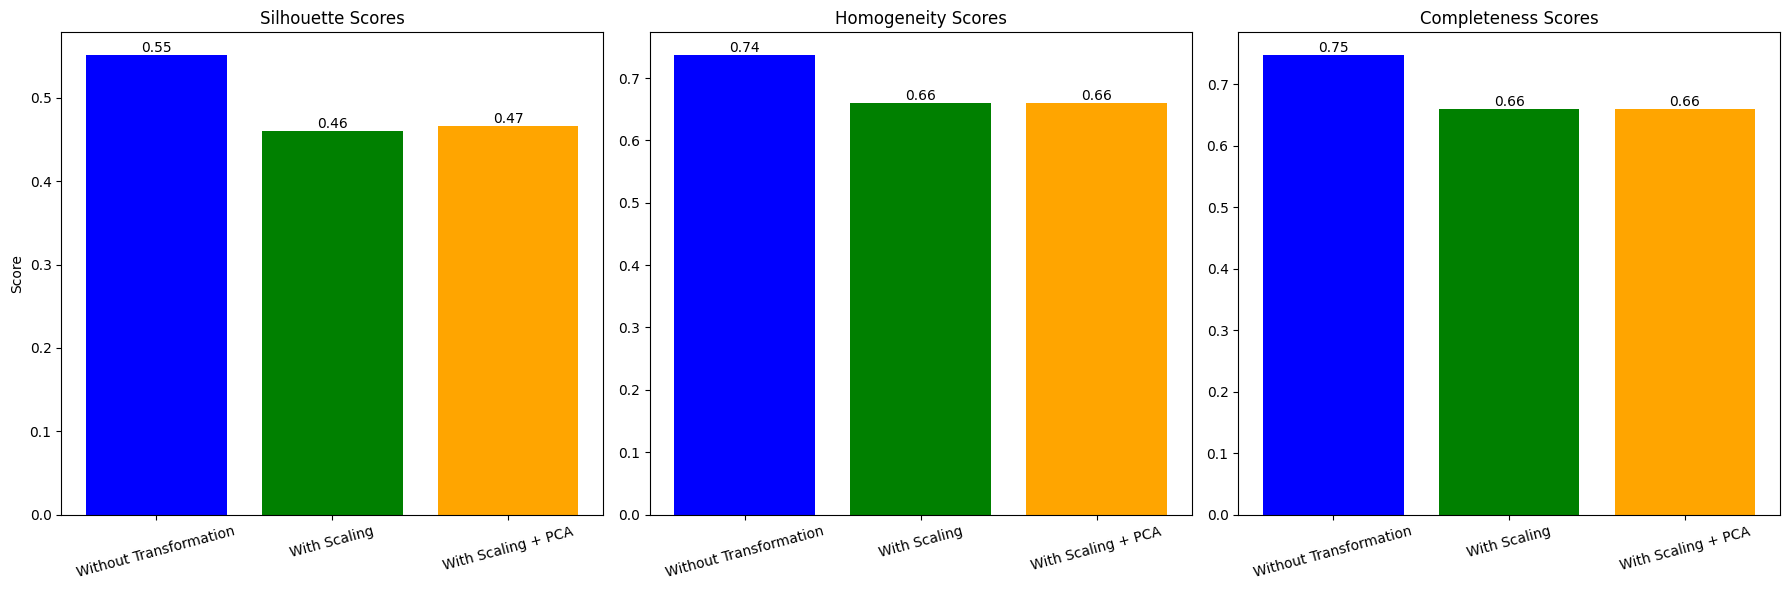

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score

# Results dictionary to store performance metrics
results = {}

# ---------- 1. Without Transformation ----------

kmeans_no_transform = KMeans(n_clusters=3, random_state=0)
labels_no_transform = kmeans_no_transform.fit_predict(features)
silh_no_transform = silhouette_score(features, labels_no_transform)
homog_no_transform = homogeneity_score(true_labels, labels_no_transform)
compl_no_transform = completeness_score(true_labels, labels_no_transform)

# Store results
results['Without Transformation'] = {
    'Silhouette Score': silh_no_transform,
    'Homogeneity Score': homog_no_transform,
    'Completeness Score': compl_no_transform
}

# ---------- 2. With Scaling ----------
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans_scaled = KMeans(n_clusters=3, random_state=0)
labels_scaled = kmeans_scaled.fit_predict(scaled_features)
silh_scaled = silhouette_score(scaled_features, labels_scaled)
homog_scaled = homogeneity_score(true_labels, labels_scaled)
compl_scaled = completeness_score(true_labels, labels_scaled)

# Store results
results['With Scaling'] = {
    'Silhouette Score': silh_scaled,
    'Homogeneity Score': homog_scaled,
    'Completeness Score': compl_scaled
}

# ---------- 3. With Scaling + PCA ----------
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)
kmeans_pca = KMeans(n_clusters=3, random_state=0)
labels_pca = kmeans_pca.fit_predict(pca_features)
silh_pca = silhouette_score(pca_features, labels_pca)
homog_pca = homogeneity_score(true_labels, labels_pca)
compl_pca = completeness_score(true_labels, labels_pca)

# Store results
results['With Scaling + PCA'] = {
    'Silhouette Score': silh_pca,
    'Homogeneity Score': homog_pca,
    'Completeness Score': compl_pca
}

# Extract scores for all approaches
approaches = list(results.keys())
silhouette_scores = [results[approach]['Silhouette Score'] for approach in approaches]
homogeneity_scores = [results[approach]['Homogeneity Score'] for approach in approaches]
completeness_scores = [results[approach]['Completeness Score'] for approach in approaches]

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Plot Silhouette Scores
bars0 = axes[0].bar(approaches, silhouette_scores, color=['blue', 'green', 'orange'])
axes[0].set_title('Silhouette Scores')
axes[0].set_ylabel('Score')
axes[0].set_xticklabels(approaches, rotation=15)
for bar in bars0:
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{bar.get_height():.2f}', ha='center', va='bottom')

# Plot Homogeneity Scores
bars1 = axes[1].bar(approaches, homogeneity_scores, color=['blue', 'green', 'orange'])
axes[1].set_title('Homogeneity Scores')
axes[1].set_xticklabels(approaches, rotation=15)
for bar in bars1:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{bar.get_height():.2f}', ha='center', va='bottom')

# Plot Completeness Scores
bars2 = axes[2].bar(approaches, completeness_scores, color=['blue', 'green', 'orange'])
axes[2].set_title('Completeness Scores')
axes[2].set_xticklabels(approaches, rotation=15)
for bar in bars2:
    axes[2].text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{bar.get_height():.2f}', ha='center', va='bottom')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

The clustering results indicate that Without Transformation produces the best clustering performance, with the highest silhouette, homogeneity, and completeness scores. The Silhouette Score of 0.55 shows that the clusters are relatively well-defined, and the Homogeneity Score of 0.74 suggests that most points in each cluster belong to the same true class, while the Completeness Score of 0.75 indicates that most points from a given true class are grouped together. In contrast, Scaling negatively affects the clustering, with a drop in both the silhouette and homogeneity scores (0.46 and 0.66, respectively), suggesting that scaling disrupts the cluster integrity. Combining Scaling + PCA results in only a slight improvement in silhouette score (0.47), but homogeneity and completeness scores remain unchanged at 0.66, indicating that PCA does not significantly enhance the clustering performance in this case.

## 8. 3D Visualization of K-Means Clustering on the Iris Dataset with Different Transformations


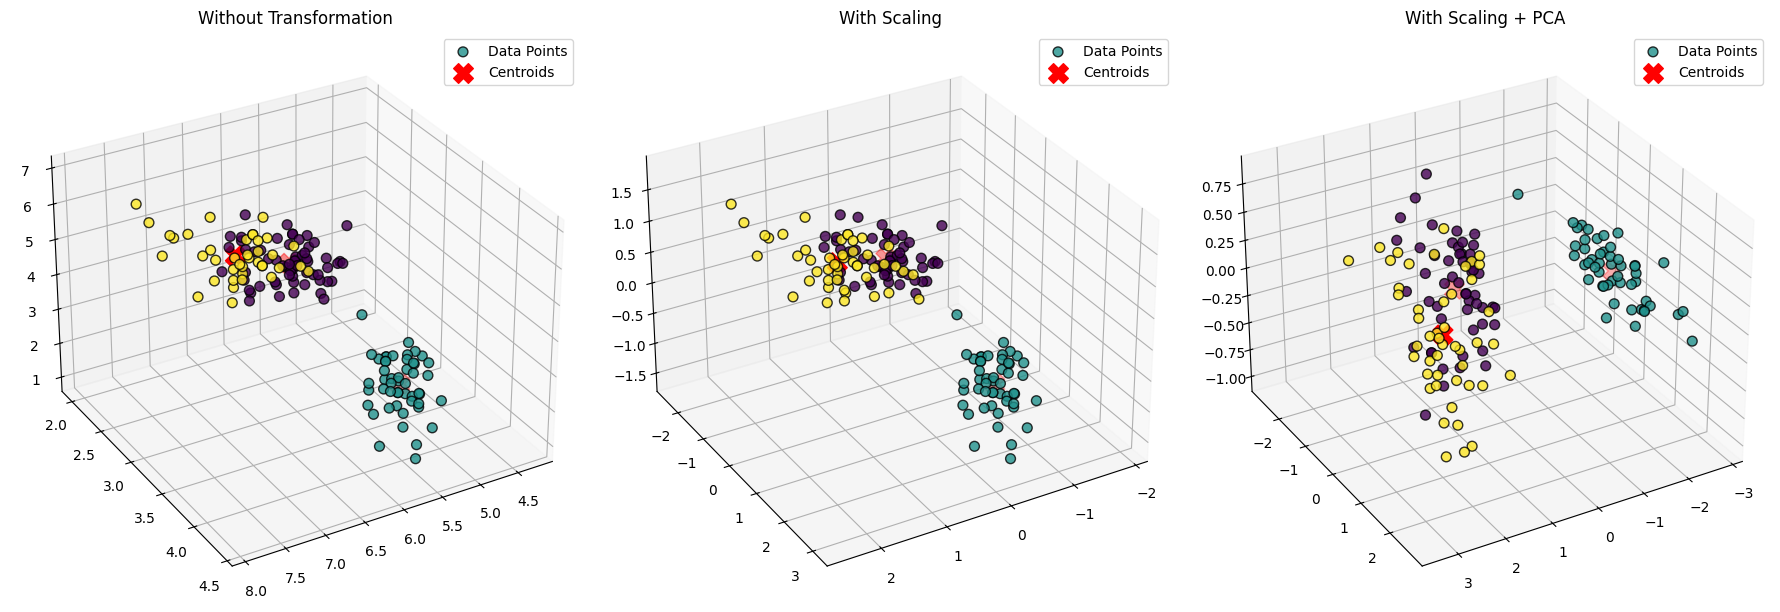

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a single figure for subplots
fig = plt.figure(figsize=(18, 6))

# Without Transformation
ax1 = fig.add_subplot(131, projection='3d', elev=30, azim=60)
ax1.scatter(features[:, 0], features[:, 1], features[:, 2],
            c=labels_no_transform.astype(float), edgecolor='k', s=50, alpha=0.8, label='Data Points')
ax1.scatter(kmeans_no_transform.cluster_centers_[:, 0], kmeans_no_transform.cluster_centers_[:, 1],
            kmeans_no_transform.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Centroids')
ax1.set_title("Without Transformation")
ax1.legend()

# With Scaling
ax2 = fig.add_subplot(132, projection='3d', elev=30, azim=60)
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], scaled_features[:, 2],
            c=labels_scaled.astype(float), edgecolor='k', s=50, alpha=0.8, label='Data Points')
ax2.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1],
            kmeans_scaled.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Centroids')
ax2.set_title("With Scaling")
ax2.legend()

# With Scaling + PCA
ax3 = fig.add_subplot(133, projection='3d', elev=30, azim=60)
ax3.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2],
            c=labels_pca.astype(float), edgecolor='k', s=50, alpha=0.8, label='Data Points')
ax3.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
            kmeans_pca.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Centroids')
ax3.set_title("With Scaling + PCA")
ax3.legend()

# Adjust layout
plt.tight_layout()
plt.show()


## 9. 2D Visualization of K-Means Clustering on the Iris Dataset with Different Transformations


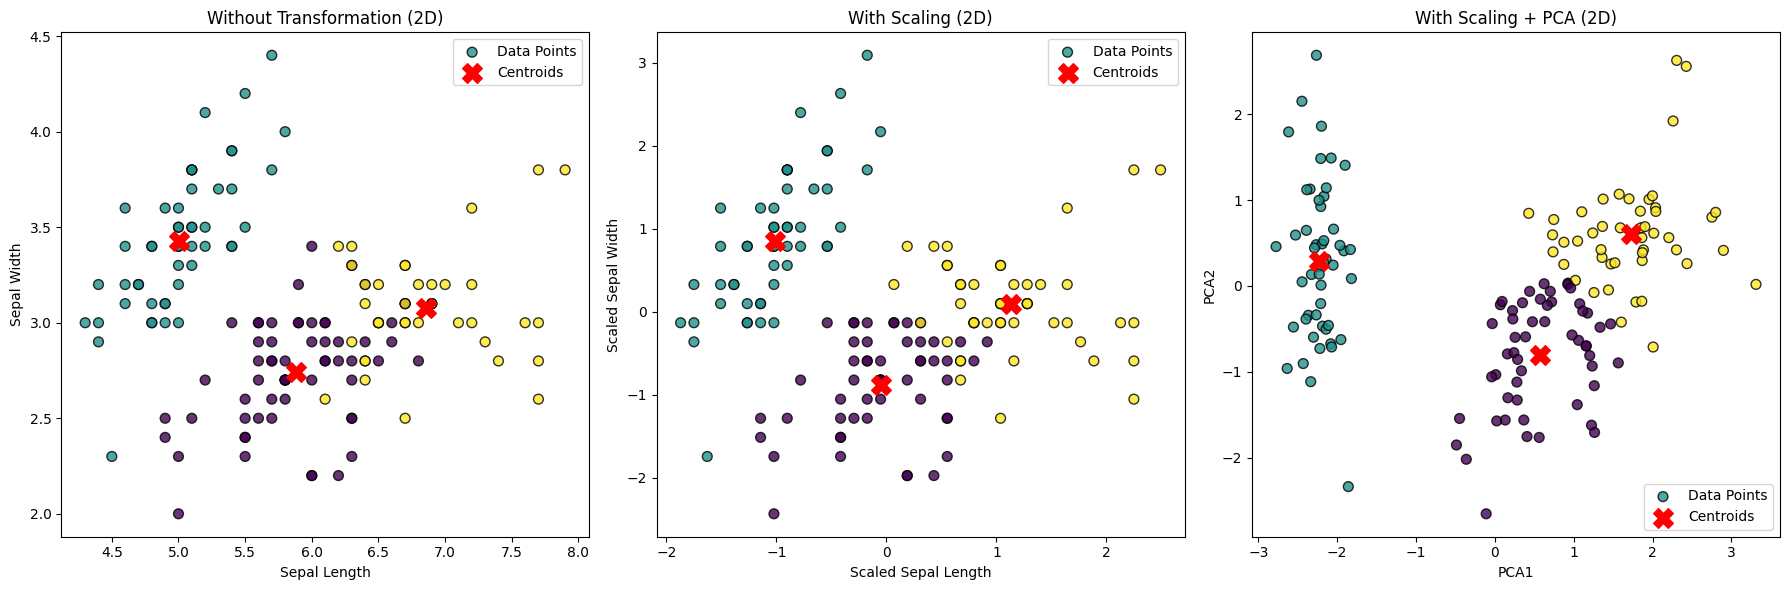

In [ ]:
import matplotlib.pyplot as plt

# Create a single figure for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

# Without Transformation (2D)
axes[0].scatter(features[:, 0], features[:, 1],
                c=labels_no_transform.astype(float), edgecolor='k', s=50, alpha=0.8, label='Data Points')
axes[0].scatter(kmeans_no_transform.cluster_centers_[:, 0], kmeans_no_transform.cluster_centers_[:, 1],
                c='red', marker='X', s=200, label='Centroids')
axes[0].set_title("Without Transformation (2D)")
axes[0].set_xlabel("Sepal Length")
axes[0].set_ylabel("Sepal Width")
axes[0].legend()

# With Scaling (2D)
axes[1].scatter(scaled_features[:, 0], scaled_features[:, 1],
                c=labels_scaled.astype(float), edgecolor='k', s=50, alpha=0.8, label='Data Points')
axes[1].scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1],
                c='red', marker='X', s=200, label='Centroids')
axes[1].set_title("With Scaling (2D)")
axes[1].set_xlabel("Scaled Sepal Length")
axes[1].set_ylabel("Scaled Sepal Width")
axes[1].legend()

# With Scaling + PCA (2D)
axes[2].scatter(pca_features[:, 0], pca_features[:, 1],
                c=labels_pca.astype(float), edgecolor='k', s=50, alpha=0.8, label='Data Points')
axes[2].scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
                c='red', marker='X', s=200, label='Centroids')
axes[2].set_title("With Scaling + PCA (2D)")
axes[2].set_xlabel("PCA1")
axes[2].set_ylabel("PCA2")
axes[2].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## 10. Comparing Clusters with Original Classes


In [ ]:
# Create a confusion matrix
confusion_matrix = pd.crosstab(iris['variety'], labels_no_transform, rownames=['True Classes'], colnames=['Clusters'])
print(confusion_matrix)

Clusters       0   1   2
True Classes            
Setosa         0  50   0
Versicolor    47   0   3
Virginica     14   0  36


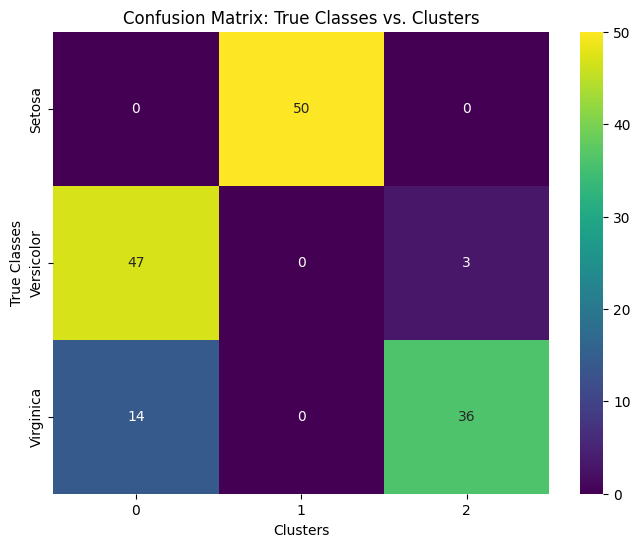

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap="viridis", fmt='d')
plt.title("Confusion Matrix: True Classes vs. Clusters")
plt.xlabel("Clusters")
plt.ylabel("True Classes")
plt.show()

Interpreting the Confusion Matrix

The confusion matrix illustrates how well the predicted clusters align with the true classes of the Iris dataset. Rows represent the actual classes (Setosa, Versicolor, and Virginica), while columns denote the predicted clusters (Cluster 0, Cluster 1, Cluster 2). Each cell indicates the number of data points from a true class assigned to a specific cluster. This matrix helps evaluate the effectiveness of clustering by revealing patterns and misclassifications.

Key Observations

Setosa forms a distinct and highly separable cluster, with all 50 samples correctly assigned to Cluster 1. Versicolor is mostly grouped into Cluster 0, but 3 samples overlap with Cluster 2, showing slight confusion with Virginica. Conversely, Virginica has a more significant overlap: 36 samples are assigned to Cluster 2, while 14 are misclassified into Cluster 0, which primarily represents Versicolor. This indicates that while Setosa is distinctly clustered, the overlap between Versicolor and Virginica reflects their similarity in the feature space and the inherent challenge of separating them completely.



## 11. Summary of Findings

#### **Optimal Number of Clusters**
The **optimal number of clusters** for the Iris dataset was determined to be **3**, based on:

1. **Elbow Method**:
   - The elbow point in the WCSS (Within-Cluster Sum of Squares) curve clearly indicates that \( k = 3 \) is the most suitable choice. After \( k = 3 \), the reduction in WCSS becomes less significant, showing diminishing returns.

2. **Silhouette Analysis**:
   - The silhouette score peaks at \( k = 3 \), confirming that this number of clusters provides the best balance between cluster cohesion (points within clusters being close to each other) and separation (clusters being well-distinguished from each other).

3. **Biological Relevance**:
   - The Iris dataset contains three species (`Setosa`, `Versicolor`, and `Virginica`), which aligns naturally with \( k = 3 \). This reinforces the selection of three clusters.

---

#### **Optimal Approach**
Clustering **without any transformations** performed best for the Iris dataset, as indicated by the highest silhouette score and clear separation of clusters in visualizations. This approach aligns with the dataset's inherent structure and properties:

1. **Silhouette Score**:
   - The silhouette score for clustering without transformations was the highest compared to other approaches (e.g., scaling, PCA, or scaling + PCA). This suggests that the raw feature space aligns well with the natural clustering structure of the data.

2. **Confusion Matrix**:
   - The confusion matrix showed that `Setosa` forms a distinct and well-separated cluster, while `Versicolor` and `Virginica` exhibit some overlap. This is consistent with domain knowledge about the Iris dataset, where petal measurements (length and width) are particularly effective at distinguishing classes.

3. **Interpretation**:
   - The Iris dataset has features (petal length and width) with significantly larger magnitudes and better separability. Scaling, which normalizes feature magnitudes, may dilute this natural dominance, thereby reducing clustering performance.
   - PCA did not add significant value due to the dataset's small dimensionality (4 features) and the clear clustering already present in the raw feature space.

---

#### **Why This Makes Sense**
1. **Feature Importance**:
   - Petal length and width are the most discriminative features in the dataset, as demonstrated in exploratory analysis. Retaining their dominance in the raw feature space leads to better-defined clusters.

2. **Low Dimensionality**:
   - With only four features, the dataset does not suffer from the "curse of dimensionality," which can make scaling or dimensionality reduction more beneficial. The features already capture sufficient information for clustering.

3. **Natural Grouping**:
   - The distinct nature of the `Setosa` cluster and the partial overlap between `Versicolor` and `Virginica` reflect the biological reality of the Iris species. K-means clustering effectively captures this structure without additional transformations.

---

#### **Conclusion**
For the Iris dataset:
1. The **optimal number of clusters** is **3**, based on the elbow method and silhouette analysis.
2. The **best approach** is to use K-means clustering on the raw data without any preprocessing. This highlights the importance of understanding the dataset characteristics before applying transformations, as scaling or dimensionality reduction is not always necessary and may even degrade performance in cases where natural feature magnitudes play a critical role.